# PCS Computer Science Project

We will start with the imports

In [14]:
%%capture
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

plt.style.use('seaborn')
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

## Task 1

We will then read and _one-hot encode_ the data.

In [2]:
def read_data(filename):
    with open(filename) as f:
        lines = f.readlines()
        data = []
        
        for line in lines:
            if line[0] == ">":
                properties = line[1:-1].split(" ")
                
                name       = properties[0]
                functional = properties[1].split("_")[1] == "true"

                data.append({
                    "name"       : name,
                    "functional" : functional,
                    "sequence"   : ""
                })
            else:
                data[-1]["sequence"] += line[:-1]

        return data

def hot_encode_sequence(sequence):
    alphabet = ["A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y", "-"]
    encoded_sequence = []
    for letter in sequence:
        encoded_letter = [0]*(len(alphabet) - 1)
        letter_idx = alphabet.index(letter)
        if letter_idx < len(alphabet) - 1:
            encoded_letter[letter_idx] = 1
        encoded_sequence += encoded_letter
    return encoded_sequence

print(hot_encode_sequence("C-W"))

def hot_encode_data(data):
    for datum in data:
        datum["hot_encoded_sequence"] = hot_encode_sequence(datum["sequence"])

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [3]:
data_art = read_data("MSA_art.faa")
hot_encode_data(data_art)

data_nat = read_data("MSA_nat_with_annotation.faa")
hot_encode_data(data_nat)

print(data_art[0])

{'name': 'sequence_1', 'functional': True, 'sequence': '-----SLEELRKEIESIDREIVELIARRTYVAKTIAQIKRERGLPTTDESQEQRVMERAGSNAKQFD-VDANLVKAIFKLLIELNKEEQRENR---', 'hot_encoded_sequence': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0

# Task 2

We will no apply PCA to the _one-hot encoded_ natural dataset to reduce its dimensionality.

In [4]:
X_nat = np.array([datum["hot_encoded_sequence"] for datum in data_nat])

In [5]:
n_components = 15
pca = PCA(n_components=n_components)
eigen_values  = pca.fit_transform(X_nat)
eigen_vectors = pca.components_

In [6]:
functional_mask            = np.array([    datum["functional"] for datum in data_nat])
functional_eigen_value     = eigen_values[    functional_mask]
non_functional_mask        = np.array([not datum["functional"] for datum in data_nat])
non_functional_eigen_value = eigen_values[non_functional_mask]

print(f"{ len(functional_eigen_value) } functional sequences, { len(non_functional_eigen_value) } non-functional sequences for a total of { len(eigen_values) } sequences.")

423 functional sequences, 707 non-functional sequences for a total of 1130 sequences.


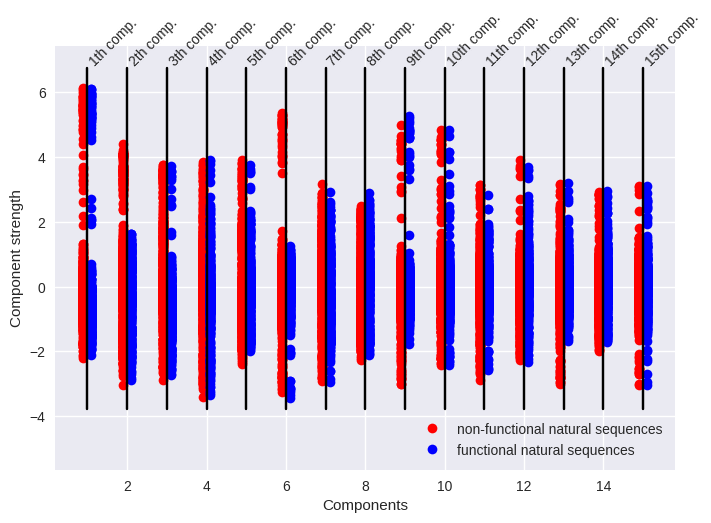

In [16]:
Min, Max = 1.1*np.min(eigen_values), 1.1*np.max(eigen_values)

for component in range(n_components):
    plt.plot(
        np.full(len(non_functional_eigen_value), component + 0.9),
        non_functional_eigen_value[:,component],
        "ro", label=("non-functional natural sequences" if component==0 else '_nolegend_'))
    
    plt.plot(
        np.full(len(functional_eigen_value),     component + 1.1),
        functional_eigen_value    [:,component],
        "bo", label=("functional natural sequences"  if component==0 else '_nolegend_'))

    plt.plot([component+1, component+1], [Min, Max], "k-")
    plt.text(component+1, Max, f"{component+1}th comp.",
            rotation=45,
            horizontalalignment="left", verticalalignment="bottom")

plt.ylim([Min*1.5, Max*1.1])
plt.xlabel("Components")
plt.ylabel("Component strength")
plt.legend(loc="lower right")

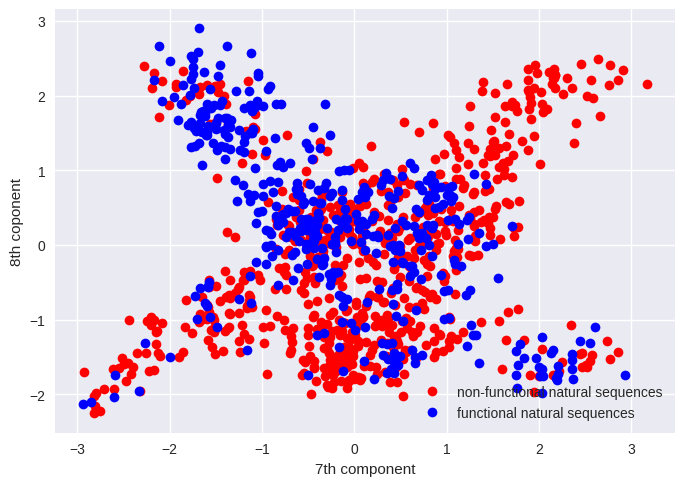

In [8]:
n1, n2 = 6, 7

plt.plot(
    non_functional_eigen_value[:,n1],
    non_functional_eigen_value[:,n2],
    "ro", label="non-functional natural sequences")
    
plt.plot(
    functional_eigen_value[:,n1],
    functional_eigen_value[:,n2],
    "bo", label="functional natural sequences")

plt.xlabel(f"{n1+1}th component")
plt.ylabel(f"{n2+1}th coponent")
plt.legend(loc="lower right")

For some principal components (the 1st, 2nd, 6th for exemple) the functional and non-functional sequences occupy the same space, but some part of the space is reserved for one or the other (for exemple only non-fonctional sequence occupy the $[2, 4]$ space for the 2nd component, whereas both functional and non-functional sequences occupy the $[-3, 2]$ space for this component).

For other component (thhe 7th and 8th for exemple) the space seems fully shared. We would need to look at the higher dimensional data to see if in the 10th dimensional space they actually share the same space. In the last figure we see that in the 2D space of the 7th and 8th PCs, the functional and non-functional sequences are somewhat separated even though in the separate 1D-space of the 7th and 8th PCs they aren't separated.

We could expect that in the 10 dimentional PC space functional and non-functional sequence, which we will prove by clustering them.

## Task 3

We will now cluster the data using the K-mean method.

In [17]:
%%capture
n_cluster = 50

est = KMeans(n_cluster)
est.fit(X_nat)
clustering = est.predict(X_nat)

In [10]:
avg_functionality, cluster_size = [], []
functionality = np.array([datum["functional"] for datum in data_nat])

for cluster in range(n_cluster):
    cluster_mask = [cluster_idx == cluster for cluster_idx in clustering]
    cluster_functionality = functionality[cluster_mask]
    
    avg_functionality.append(np.mean(cluster_functionality))
    cluster_size.append(len(cluster_functionality))

In [11]:
functional_functional, nonFunctional_functional = 0, 0
functional_nonFunctional, nonFunctional_nonFuctional = 0, 0

cutoff = len(functional_eigen_value)/len(eigen_values)

for cluster in range(n_cluster):
    if avg_functionality[cluster] > cutoff:
        functional_functional      +=      avg_functionality[cluster] *cluster_size[cluster]
        nonFunctional_functional   += (1 - avg_functionality[cluster])*cluster_size[cluster]
    else:
        functional_nonFunctional   +=      avg_functionality[cluster] *cluster_size[cluster]
        nonFunctional_nonFuctional += (1 - avg_functionality[cluster])*cluster_size[cluster]

print(f"{round(functional_functional)} functional sequence",
f"and {round(nonFunctional_functional)} non-functional sequences in cluster with more than {round(cutoff*100)}% of functional sequences,",
f"corresponding to {round(functional_functional/(functional_functional + nonFunctional_functional)*100)}% functional sequences in this group,",
f"and {round(functional_functional/len(functional_eigen_value)*100)}% of all functional sequences")

print(f"{round(functional_nonFunctional)} functional sequence",
f"and {round(nonFunctional_nonFuctional)} non-functional sequences in cluster with less than {round(cutoff*100)} of functional sequences,",
f"corresponding to {round(nonFunctional_nonFuctional/(functional_nonFunctional + nonFunctional_nonFuctional)*100)}% non-functional sequences in this group,",
f"and {round(nonFunctional_nonFuctional/len(non_functional_eigen_value)*100)}% of all non-functional sequences")

329 functional sequence and 186 non-functional sequences in cluster with more than 37% of functional sequences, corresponding to 64% functional sequences in this group, and 78% of all functional sequences
94 functional sequence and 521 non-functional sequences in cluster with less than 37 of functional sequences, corresponding to 85% non-functional sequences in this group, and 74% of all non-functional sequences


After trying multiple number of clusters, and playing with the "cutoff" (we choose a cutoff equal to the global proportion of functional sequences) at which we choose if a cluster is a "primarly functional" cluster or a "primarly non-functional" cluster, we separated clusters in those two groups:
 - a majority (64%) of sequences in "primarly functional clusters" are functional.
 - a large majority (85%) of sequences in "primarly non-functional clusters" are non-functional.
 - a large majority (78%) of functional sequences end up in "primarly functional clusters".
 - a large majority (74%) of non-functional sequences end up in "primarly non-functional clusters".

We can conclude that functional and non-functional sequences are somewhat separated in the clusters, and thus are separated in PCs space.

## Task 4